# Part 1: Titanic Dataset Practice

I will follow my old notes and use the Titanic Dataset to practice and remember the ins and outs of this algorithm. This involves:


*   Importing the Dataset and Relevant Modules
*   Preprocessing: which involves dropping irrelevant columns, filling in NA values with 0, and converting all non-numeric ones to numeric data where possible, as well as scaling the data.
*   Dropping what we want to predict for (survived column)
*   Running a model using scikitlearn module and checking accuracy




In [3]:
# Load Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [4]:
# Import Dataset from pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls


df = pd.read_excel('/content/titanic.xls')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [5]:
# Drop unimportant columns

df.drop(['body', 'name'], 1, inplace=True)

In [6]:
 # Fill NA values with 0, as Kmeans only takes numeric data

df.fillna(0, inplace=True)

In [7]:
# Making sure it worked

print(df.head())

   pclass  survived     sex  ...  embarked  boat                        home.dest
0       1         1  female  ...         S     2                     St Louis, MO
1       1         1    male  ...         S    11  Montreal, PQ / Chesterville, ON
2       1         0  female  ...         S     0  Montreal, PQ / Chesterville, ON
3       1         0    male  ...         S     0  Montreal, PQ / Chesterville, ON
4       1         0  female  ...         S     0  Montreal, PQ / Chesterville, ON

[5 rows x 12 columns]


In [8]:
# A bit of data cleaning to handle the other non-numeric data

def handle_non_numerical_data(df):
  columns = df.columns.values

  for column in columns:
    text_digit_vals = {}
    def convert_to_int(val):
      return text_digit_vals[val]

    if df[column].dtype != np.int64 and df[column].dtype != np.float64:
      column_contents = df[column].values.tolist()
      unique_elements = set(column_contents)
      x = 0
      for unique in unique_elements:
        if unique not in text_digit_vals:
          text_digit_vals[unique] = x
          x+=1

      df[column] = list(map(convert_to_int, df[column]))

  return df

In [9]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"


In [10]:
# Showing Before and After the processing

df = handle_non_numerical_data(df)
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,1,29.0000,0,0,763,211.3375,110,2,1,349
1,1,1,0,0.9167,1,2,500,151.5500,25,2,18,193
2,1,0,1,2.0000,1,2,500,151.5500,25,2,0,193
3,1,0,0,30.0000,1,2,500,151.5500,25,2,0,193
4,1,0,1,25.0000,1,2,500,151.5500,25,2,0,193


In [11]:
# We want to predict for whether or not Titanc passengers survived, 
# so we drop the 'survived' column from the training set.

# We also scale the data to improve accuracy 

X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

In [12]:
# We Run a basic Kmeans model using the scikitlearn module we imported

# The clusters are arbitrary, but one is consistently around 70%, and the other 
# consistently around 30%

model = KMeans(n_clusters=2)
model.fit(X)

correct = 0
for i in range(len(X)):
  predict_me = np.array(X[i].astype(float))
  predict_me = predict_me.reshape(-1, len(predict_me))
  prediction = model.predict(predict_me)
  if prediction[0] == y[i]:
    correct += 1

print(correct / len(X))

0.28418640183346067


In [13]:
# I checked to see if dropping the ticket column improves accuracy, which it
# does seem to slightly

df.drop(['ticket'], 1, inplace=True)

In [14]:
model = KMeans(n_clusters=2)
model.fit(X)

correct = 0
for i in range(len(X)):
  predict_me = np.array(X[i].astype(float))
  predict_me = predict_me.reshape(-1, len(predict_me))
  prediction = model.predict(predict_me)
  if prediction[0] == y[i]:
    correct += 1

print(correct / len(X))

0.7165775401069518


In [15]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,boat,home.dest
0,1,1,1,29.0000,0,0,211.3375,110,2,1,349
1,1,1,0,0.9167,1,2,151.5500,25,2,18,193
2,1,0,1,2.0000,1,2,151.5500,25,2,0,193
3,1,0,0,30.0000,1,2,151.5500,25,2,0,193
4,1,0,1,25.0000,1,2,151.5500,25,2,0,193


# Part 2: Coding Up A custom Kmeans Algorithm from Scratch
*   Creating a small practice array, with 2 sort of distinct clusters on a plane
*   Coding up the Algorithm
*   Making a basic prediction on the small dataset

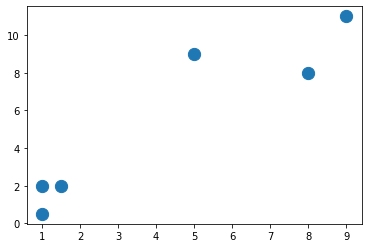

In [16]:
# practice array

X = np.array([[1,2],
               [1.5, 2.0],
               [5, 9],
               [8, 8],
               [1, 0.5],
               [9, 11]])

colors = 10 * ["g", "r", "c", "b", "k"]

# X = np.array(np.random.random((100, 5)))

plt.scatter(X[:,0], X[:,1], s=150)
plt.style.use(['dark_background'])
plt.show()

In [17]:
# create custom km

class K_Meanz:
  def __init__(self, k=2, tol=0.001, max_iter=300):
    self.k = k
    self.tol = tol
    self.max_iter = max_iter

  def fit(self, data):
    
    self.centroids = {}

    for i in range(self.k):
      self.centroids[i] = data[i]

    for i in range(self.max_iter):
      self.classifications = {}

      for i in range(self.k):
        self.classifications[i] = []

      for featureset in data:
        distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        self.classifications[classification].append(featureset)

      prev_centroids = dict(self.centroids)

      for classification in self.classifications:
        pass
        self.centroids[classification] = np.average(self.classifications[classification], axis=0)

      optimized = True

      for c in self.centroids:
        original_centroid = prev_centroids[c]
        current_centroid = self.centroid[c]
        if np.sum((current_centroid-original_centroid) / original_centroids * 100.0) > self.tol:
          optimized = False

      if optimized:
        break

  def predict(self, data):
    distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
    classification = distances.index(min(distances))
    return classification



In [18]:
class K_Meanz:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

    def predict(self, data):
      distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
      classification = distances.index(min(distances))
      return classification
    

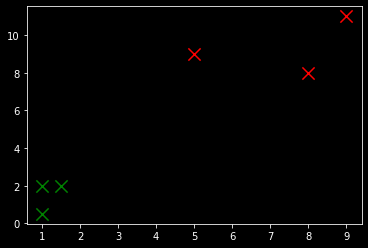

In [19]:
model = K_Meanz()
model.fit(X)

for centroid in model.centroids:
  plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
              marker="o", color="k", s=150, linewidths=5)

for classification in model.classifications:
  color = colors[classification]
  for featureset in model.classifications[classification]:
    plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

plt.show()

## Part 3: Testing it on Titanic Dataset and comparing it with the Scikitlearn version
-Test with titanic dataset
-Use seaborn for visualizations
-Add time and accuracy comparisons to run vs sklearn version
-

In [20]:
## Todo:
